# Neural network Tuning

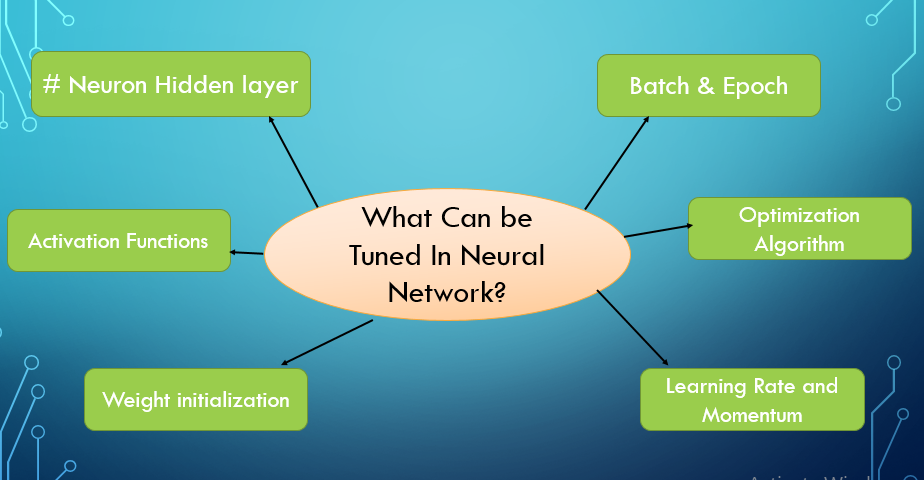

In [70]:
from IPython.display import Image
Image(filename='C:\\Users\\User\\Desktop\\tuning.png')

In [71]:
# Importing necesary packages
import numpy
import pandas as pd
from sklearn.model_selection import GridSearchCV 
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')
from keras.wrappers.scikit_learn import KerasClassifier

# part 1 - Tuning batch and epoch

In [31]:
# load the dataset for India diabetes
data = pd.read_csv('C:\\Users\\User\\Downloads\\diabetes.csv')

In [32]:
#viewing data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
# split into predictors and response
X = data.iloc[:,0:8] #predictors
Y = data.iloc[:,8] #response

In [30]:
# Function to create model,for KerasClassifier
def create_my_model():
    #defining my model
    mymodel = Sequential()
    mymodel.add(Dense(12, input_dim=8, activation='relu'))
    mymodel.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    mymodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return mymodel

In [34]:
# create model
model = KerasClassifier(build_fn=create_my_model)

In [35]:
# define the grid search parameters
batchSize = [10, 20, 40, 60, 80, 100]
epochs = [10, 30, 50]

In [36]:
parameter_grid = dict(batch_size=batchSize, epochs=epochs)


mygrid = GridSearchCV(estimator=model, param_grid=parameter_grid, n_jobs=-1, cv=3)
grid_result = mygrid.fit(X, Y)

Epoch 1/50
768/768 [==============================] - 1s 1ms/step - loss: 12.3063 - accuracy: 0.4401
Epoch 2/50
768/768 [==============================] - 0s 259us/step - loss: 3.1792 - accuracy: 0.5951
Epoch 3/50
768/768 [==============================] - 0s 240us/step - loss: 2.3888 - accuracy: 0.6120
Epoch 4/50
768/768 [==============================] - 0s 280us/step - loss: 2.0140 - accuracy: 0.6029
Epoch 5/50
768/768 [==============================] - 0s 263us/step - loss: 1.5988 - accuracy: 0.6185
Epoch 6/50
768/768 [==============================] - 0s 250us/step - loss: 1.3167 - accuracy: 0.6276
Epoch 7/50
768/768 [==============================] - 0s 406us/step - loss: 1.1392 - accuracy: 0.6081
Epoch 8/50
768/768 [==============================] - 0s 362us/step - loss: 1.0216 - accuracy: 0.6094
Epoch 9/50
768/768 [==============================] - 0s 340us/step - loss: 0.9658 - accuracy: 0.6081
Epoch 10/50
768/768 [==============================] - 0s 340us/step - loss: 0.9297

In [37]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.679688 using {'batch_size': 10, 'epochs': 50}


# part 2- Optimizing Activation Function

In [65]:
# Function to create model
def create_my_model(optimizer='adam'):
    # create model
    mymodel = Sequential()
    mymodel.add(Dense(12, input_dim=8, activation='relu'))
    mymodel.add(Dense(1, activation='sigmoid'))
    # Compile model
    mymodel.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return mymodel

In [66]:
# create model
model = KerasClassifier(build_fn=create_my_model, epochs=50, batch_size=10)

In [67]:
# define the grid search parameters
optimizer = ['SGD','Adadelta', 'RMSprop', 'Adagrad','Adam']
parameter_grid = dict(optimizer=optimizer)

In [68]:
grid = GridSearchCV(estimator=model, param_grid=parameter_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)

Epoch 1/50
768/768 [==============================] - 1s 677us/step - loss: 1.5185 - accuracy: 0.6445
Epoch 2/50
768/768 [==============================] - 0s 177us/step - loss: 0.6720 - accuracy: 0.6615
Epoch 3/50
768/768 [==============================] - 0s 177us/step - loss: 0.6598 - accuracy: 0.6602
Epoch 4/50
768/768 [==============================] - 0s 198us/step - loss: 0.6476 - accuracy: 0.6602
Epoch 5/50
768/768 [==============================] - 0s 177us/step - loss: 0.6397 - accuracy: 0.6849
Epoch 6/50
768/768 [==============================] - 0s 177us/step - loss: 0.6369 - accuracy: 0.6732
Epoch 7/50
768/768 [==============================] - 0s 229us/step - loss: 0.6322 - accuracy: 0.6745
Epoch 8/50
768/768 [==============================] - 0s 208us/step - loss: 0.6273 - accuracy: 0.6810
Epoch 9/50
768/768 [==============================] - 0s 187us/step - loss: 0.6226 - accuracy: 0.6784
Epoch 10/50
768/768 [==============================] - 0s 177us/step - loss: 0.621

In [69]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.680990 using {'optimizer': 'SGD'}


# How can you improve accuracy of the model?